In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE
from datetime import datetime
from matplotlib import pyplot as plt
from joblib import dump

%matplotlib inline

In [2]:
# First we load our dataset from the previous scratchpad with K-means Cluster Lables.

data_filepath = "random_forest_dataset.csv"
df = pd.read_csv(data_filepath)

In [3]:
# We will check our data's profile before proceeding.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 48 columns):
Unnamed: 0         1116 non-null int64
importance         1116 non-null float64
latitude           1116 non-null float64
longitude          1116 non-null float64
prices             1116 non-null float64
sale_dates         1116 non-null object
Non-Newbuild       1116 non-null int64
Detached           1116 non-null int64
Flat               1116 non-null int64
Semi Detached      1116 non-null int64
Terraced           1116 non-null int64
Freehold           1116 non-null int64
Leasehold          1116 non-null int64
amenity            1116 non-null int64
building           1116 non-null int64
highway            1116 non-null int64
landuse            1116 non-null int64
place              1116 non-null int64
shop               1116 non-null int64
cafe               1116 non-null int64
city               1116 non-null int64
convenience        1116 non-null int64
cycleway           1116 no

In [4]:
# We need to drop our first unnamed column, which is an artefact of importing the dataset from a CSV.

df = df.drop(df.columns[0], axis=1)
df.head()

,importance,latitude,longitude,prices,sale_dates,Non-Newbuild,Detached,Flat,Semi Detached,Terraced,...,0,1,2,3,4,5,6,7,8,9
0,0.61,51.553902,0.023391,420000.0,2018-09-25,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.51,51.556909,0.017585,420000.0,2018-09-25,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.52,51.478533,-0.110912,560000.0,2018-09-25,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.51,51.493612,-0.313211,495000.0,2018-09-24,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.61,51.417612,-0.119799,535000.0,2018-09-24,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
# We need to convert our sales_dates back to datetime objects:

df.sale_dates = [datetime.strptime(date, "%Y-%m-%d") for date in df.sale_dates]

In [6]:
# Our sales dates should now look a lot better.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 47 columns):
importance         1116 non-null float64
latitude           1116 non-null float64
longitude          1116 non-null float64
prices             1116 non-null float64
sale_dates         1116 non-null datetime64[ns]
Non-Newbuild       1116 non-null int64
Detached           1116 non-null int64
Flat               1116 non-null int64
Semi Detached      1116 non-null int64
Terraced           1116 non-null int64
Freehold           1116 non-null int64
Leasehold          1116 non-null int64
amenity            1116 non-null int64
building           1116 non-null int64
highway            1116 non-null int64
landuse            1116 non-null int64
place              1116 non-null int64
shop               1116 non-null int64
cafe               1116 non-null int64
city               1116 non-null int64
convenience        1116 non-null int64
cycleway           1116 non-null int64
footway           

In [7]:
df.head()

,importance,latitude,longitude,prices,sale_dates,Non-Newbuild,Detached,Flat,Semi Detached,Terraced,...,0,1,2,3,4,5,6,7,8,9
0,0.61,51.553902,0.023391,420000.0,2018-09-25,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.51,51.556909,0.017585,420000.0,2018-09-25,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.52,51.478533,-0.110912,560000.0,2018-09-25,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.51,51.493612,-0.313211,495000.0,2018-09-24,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.61,51.417612,-0.119799,535000.0,2018-09-24,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
# We will now look at the summary stats of our data to see if we have something sensible.

df.describe()

,importance,latitude,longitude,prices,Non-Newbuild,Detached,Flat,Semi Detached,Terraced,Freehold,...,0,1,2,3,4,5,6,7,8,9
count,1116.000000,1116.000000,1116.000000,1.116000e+03,1116.0,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.558881,51.509563,-0.110380,8.965905e+05,1.0,0.043907,0.328853,0.149642,0.477599,0.655914,...,0.086022,0.125448,0.119176,0.104839,0.087814,0.095878,0.108423,0.122760,0.083333,0.066308
std,0.078377,0.064802,0.106220,1.135025e+06,0.0,0.204980,0.470007,0.356880,0.499722,0.475282,...,0.280522,0.331375,0.324140,0.306483,0.283151,0.294556,0.311053,0.328308,0.276509,0.248932
min,0.221000,51.352929,-0.396516,1.000000e+05,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.510000,51.459083,-0.190852,4.250000e+05,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.521000,51.501242,-0.113263,5.950000e+05,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.610000,51.558593,-0.035301,9.300000e+05,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.975490,51.700760,0.234830,1.400000e+07,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# We will now set up our dependent variable y, and our independent variables X.

y = df.prices
X = df.drop(["prices"], axis=1)

# We will sadly need to drop sale_dates too, as datetime variables are not appropriate for this type of model.
# Another day, we can explore the impact of date of sale category dummies on the sale price.

X = X.drop(["sale_dates"], axis=1)

In [10]:
y.describe()

count    1.116000e+03
mean     8.965905e+05
std      1.135025e+06
min      1.000000e+05
25%      4.250000e+05
50%      5.950000e+05
75%      9.300000e+05
max      1.400000e+07
Name: prices, dtype: float64

In [11]:
X.describe()

,importance,latitude,longitude,Non-Newbuild,Detached,Flat,Semi Detached,Terraced,Freehold,Leasehold,...,0,1,2,3,4,5,6,7,8,9
count,1116.000000,1116.000000,1116.000000,1116.0,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.558881,51.509563,-0.110380,1.0,0.043907,0.328853,0.149642,0.477599,0.655914,0.344086,...,0.086022,0.125448,0.119176,0.104839,0.087814,0.095878,0.108423,0.122760,0.083333,0.066308
std,0.078377,0.064802,0.106220,0.0,0.204980,0.470007,0.356880,0.499722,0.475282,0.475282,...,0.280522,0.331375,0.324140,0.306483,0.283151,0.294556,0.311053,0.328308,0.276509,0.248932
min,0.221000,51.352929,-0.396516,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.510000,51.459083,-0.190852,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.521000,51.501242,-0.113263,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.610000,51.558593,-0.035301,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.975490,51.700760,0.234830,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
forest_model_naive = RandomForestRegressor(random_state=1)
forest_model_naive.fit(X, y)
y_hat = forest_model_naive.predict(X)

In [13]:
# We can observe the Mean Absolute Error of our naive model without splitting  the data into a training set.

MAE(y, y_hat)

142763.72500853389

In [14]:
# We will now split our data and look at the out of sample predictive power of our trained model instead.

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

forest_model_trained = RandomForestRegressor(random_state=1)
forest_model_trained.fit(train_X, train_y)
y_hat_trained = forest_model_trained.predict(val_X)

In [15]:
# We can now look at our out-of-sample model prediction MAE for verification.

MAE(val_y, y_hat_trained)

354279.03628946922

In [16]:
# It becomes abundantly clear that our naive model is better in this low sample size situation.
# We will optimise it as best as we can given other parameters we can control, like maximum tree leaf nodes.

def get_MAE(max_leaf_nodes, X, y, model_type):
    model = model_type(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X, y)
    y_hat = model.predict(X)
    return MAE(y, y_hat)

In [17]:
rfr_utility_func_data = {'max_leaf_nodes' : [], 'MAE': []}

for max_leaf_nodes in [i**2 for i in xrange(2, 50)]:
    my_mae = get_MAE(max_leaf_nodes, X, y, RandomForestRegressor)
    rfr_utility_func_data['max_leaf_nodes'].append(max_leaf_nodes)
    rfr_utility_func_data['MAE'].append(my_mae)

The minimum MAE is 143970.945027 in an RFR model with 676 maximum leaf nodes


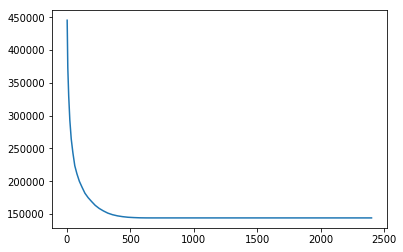

In [18]:
rfr_utility_function_plot = pd.DataFrame.from_dict(rfr_utility_func_data)
rfr_minimum_mae = rfr_utility_function_plot.MAE.min()
rfr_best_max_nodes = rfr_utility_function_plot.max_leaf_nodes[rfr_utility_function_plot.MAE.idxmin]

print "The minimum MAE is {} in an RFR model with {} maximum leaf nodes".format(rfr_minimum_mae, rfr_best_max_nodes)

plt.plot(rfr_utility_function_plot.max_leaf_nodes, rfr_utility_function_plot.MAE)

In [19]:
# We will pick this model with the suggested maximum leaf nodes above, and serialise it for use in our API.

serialised_model = RandomForestRegressor(random_state=1, max_leaf_nodes=rfr_best_max_nodes)
serialised_model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=676,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [20]:
# We will now dump the model to a file via joblib, which handles numpy arrays better than pickle.

dump(serialised_model, "serialised_random_forest_regressor.joblib")

['serialised_random_forest_regressor.joblib']